In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train =  train.dropna()
train

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل
...,...,...,...,...,...,...,...,...,...,...,...,...
8920,m_57,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,69,50,موقعیت از دست رفته
8921,m_59,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,15,53,برخورد به دفاع
8922,m_55,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,84,34,موقعیت از دست رفته
8923,m_33,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,4,39,موقعیت از دست رفته


In [3]:
y_train = train['outcome']
train = train.drop(['matchId', 'outcome'], axis=1)
train

,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second
0,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9
1,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4
2,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31
3,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2
4,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46
...,...,...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,69,50
8921,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,15,53
8922,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,84,34
8923,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,4,39


In [4]:
train['time'] = train['minute'] * 60 + train['second']
train = train.drop(['minute', 'second'], axis=1)

train

,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,time
0,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,4209
1,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,3304
2,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,5191
3,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,4622
4,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,4606
...,...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,4190
8921,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,953
8922,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,5074
8923,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,279


In [5]:
train['dist'] = np.sqrt(train['x'] ** 2 + train['y'] ** 2)
train = train.drop(['x', 'y'], axis=1)
train

,playerId,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist
0,p_103,جریان بازی,پای راست,1,0,متوسط,4209,17.530810
1,p_16,جریان بازی,پای چپ,3,0,متوسط,3304,17.090313
2,p_88,ضربه آزاد مستقیم,پای چپ,6,2,کم,5191,29.456534
3,p_87,جریان بازی,پای راست,4,1,متوسط,4622,26.948560
4,p_9,جریان بازی,پای راست,2,0,متوسط,4606,11.932141
...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,3,0,زیاد,4190,7.609895
8921,p_76,جریان بازی,پای راست,4,1,متوسط,953,23.158484
8922,p_150,جریان بازی,پای چپ,3,0,متوسط,5074,12.400746
8923,p_130,جریان بازی,پای راست,1,0,زیاد,279,9.524222


In [6]:
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('کم', 0)
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('متوسط', 1)
train['interferenceOnShooter'] = train['interferenceOnShooter'].replace('زیاد', 2)
train

,playerId,playType,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist
0,p_103,جریان بازی,پای راست,1,0,1,4209,17.530810
1,p_16,جریان بازی,پای چپ,3,0,1,3304,17.090313
2,p_88,ضربه آزاد مستقیم,پای چپ,6,2,0,5191,29.456534
3,p_87,جریان بازی,پای راست,4,1,1,4622,26.948560
4,p_9,جریان بازی,پای راست,2,0,1,4606,11.932141
...,...,...,...,...,...,...,...,...
8920,p_115,جریان بازی,سر,3,0,2,4190,7.609895
8921,p_76,جریان بازی,پای راست,4,1,1,953,23.158484
8922,p_150,جریان بازی,پای چپ,3,0,1,5074,12.400746
8923,p_130,جریان بازی,پای راست,1,0,2,279,9.524222


In [7]:
train = pd.concat([train, pd.get_dummies(train['playType'])], axis=1)
train = train.drop(['playType'], axis=1)
train

,playerId,bodyPart,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی
0,p_103,پای راست,1,0,1,4209,17.530810,1,0,0,0
1,p_16,پای چپ,3,0,1,3304,17.090313,1,0,0,0
2,p_88,پای چپ,6,2,0,5191,29.456534,0,1,0,0
3,p_87,پای راست,4,1,1,4622,26.948560,1,0,0,0
4,p_9,پای راست,2,0,1,4606,11.932141,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,سر,3,0,2,4190,7.609895,1,0,0,0
8921,p_76,پای راست,4,1,1,953,23.158484,1,0,0,0
8922,p_150,پای چپ,3,0,1,5074,12.400746,1,0,0,0
8923,p_130,پای راست,1,0,2,279,9.524222,1,0,0,0


In [8]:
train = pd.concat([train, pd.get_dummies(train['bodyPart'])], axis=1)
train = train.drop(['bodyPart'], axis=1)
train

,playerId,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی,سایر,سر,پای راست,پای چپ
0,p_103,1,0,1,4209,17.530810,1,0,0,0,0,0,1,0
1,p_16,3,0,1,3304,17.090313,1,0,0,0,0,0,0,1
2,p_88,6,2,0,5191,29.456534,0,1,0,0,0,0,0,1
3,p_87,4,1,1,4622,26.948560,1,0,0,0,0,0,1,0
4,p_9,2,0,1,4606,11.932141,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,3,0,2,4190,7.609895,1,0,0,0,0,1,0,0
8921,p_76,4,1,1,953,23.158484,1,0,0,0,0,0,1,0
8922,p_150,3,0,1,5074,12.400746,1,0,0,0,0,0,0,1
8923,p_130,1,0,2,279,9.524222,1,0,0,0,0,0,1,0


## Min Max Scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler

mms_interveningOpponents = MinMaxScaler()
mms_interveningTeammates = MinMaxScaler()
mms_interferenceOnShooter = MinMaxScaler()
mms_time = MinMaxScaler()
mms_dist = MinMaxScaler()

train['interveningOpponents'] = mms_interveningOpponents.fit_transform(train['interveningOpponents'].values.reshape(-1, 1))
train['interveningTeammates'] = mms_interveningTeammates.fit_transform(train['interveningTeammates'].values.reshape(-1, 1))
train['interferenceOnShooter'] = mms_interferenceOnShooter.fit_transform(train['interferenceOnShooter'].values.reshape(-1, 1))
train['time'] = mms_time.fit_transform(train['time'].values.reshape(-1, 1))
train['dist'] = mms_dist.fit_transform(train['dist'].values.reshape(-1, 1))

train

,playerId,interveningOpponents,interveningTeammates,interferenceOnShooter,time,dist,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی,سایر,سر,پای راست,پای چپ
0,p_103,0.090909,0.000000,0.5,0.710980,0.240478,1,0,0,0,0,0,1,0
1,p_16,0.272727,0.000000,0.5,0.558108,0.234311,1,0,0,0,0,0,0,1
2,p_88,0.545455,0.285714,0.0,0.876858,0.407435,0,1,0,0,0,0,0,1
3,p_87,0.363636,0.142857,0.5,0.780743,0.372324,1,0,0,0,0,0,1,0
4,p_9,0.181818,0.000000,0.5,0.778041,0.162098,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,p_115,0.272727,0.000000,1.0,0.707770,0.101587,1,0,0,0,0,1,0,0
8921,p_76,0.363636,0.142857,0.5,0.160980,0.319264,1,0,0,0,0,0,1,0
8922,p_150,0.272727,0.000000,0.5,0.857095,0.168658,1,0,0,0,0,0,0,1
8923,p_130,0.090909,0.000000,1.0,0.047128,0.128387,1,0,0,0,0,0,1,0


In [10]:
for i in ['گُل',        'گُل به خودی']:
    y_train = y_train.replace(i, 1)
    
for i in ['مهار توسط دروازه بان', 'موقعیت از دست رفته','برخورد به دفاع', 'برخورد به تیردروازه']:
    y_train = y_train.replace(i, 0)
    
y_train.value_counts()

0    7810
1    1081
Name: outcome, dtype: int64

## Model

In [11]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, train_test_split

In [12]:
X = train.drop(['playerId'], axis=1).values
y = y_train.values

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
param_grid = {'solver': ['lbfgs', 'liblinear'],
                  'C': [0.01, 0.1, 0.5, 1.0, 1.5, 10.0]}

grid_lr = GridSearchCV(model, param_grid, scoring=['roc_auc', 'accuracy'], n_jobs=-1,
                        refit='roc_auc', cv=5, verbose=1, return_train_score=True)

grid_lr.fit(X, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 1.5, 10.0],
                         'solver': ['lbfgs', 'liblinear']},
             refit='roc_auc', return_train_score=True,
             scoring=['roc_auc', 'accuracy'], verbose=1)

In [14]:
results = pd.DataFrame(grid_lr.cv_results_).sort_values('rank_test_roc_auc')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,split3_test_roc_auc,split4_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_train_accuracy,split1_train_accuracy,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,mean_train_accuracy,std_train_accuracy
10,0.196040,0.015334,0.002194,0.000399,10.0,lbfgs,"{'C': 10.0, 'solver': 'lbfgs'}",0.784800,0.789112,0.823707,0.799420,0.790997,0.797607,0.013888,1,0.803370,0.801656,0.792563,0.799246,0.801234,0.799614,0.003762,0.896571,0.888639,0.888639,0.890889,0.885827,0.890113,0.003606,1,0.887655,0.890342,0.889779,0.889639,0.890201,0.889523,0.000969
11,0.047993,0.013601,0.005688,0.001716,10.0,liblinear,"{'C': 10.0, 'solver': 'liblinear'}",0.784809,0.789044,0.823671,0.799435,0.791029,0.797598,0.013879,2,0.803372,0.801664,0.792565,0.799257,0.801245,0.799621,0.003763,0.896571,0.888639,0.888639,0.890889,0.885827,0.890113,0.003606,1,0.887655,0.890342,0.889779,0.889498,0.890201,0.889495,0.000968
8,0.157380,0.010468,0.005185,0.000400,1.5,lbfgs,"{'C': 1.5, 'solver': 'lbfgs'}",0.784192,0.787846,0.823440,0.798860,0.790348,0.796937,0.014104,3,0.802554,0.801147,0.791873,0.798583,0.800747,0.798981,0.003775,0.896571,0.887514,0.885827,0.890326,0.884139,0.888876,0.004357,4,0.886952,0.888795,0.889779,0.888373,0.889920,0.888764,0.001078
9,0.037299,0.003192,0.004987,0.000631,1.5,liblinear,"{'C': 1.5, 'solver': 'liblinear'}",0.784145,0.787295,0.823413,0.798827,0.790380,0.796812,0.014171,4,0.802512,0.801137,0.791791,0.798557,0.800692,0.798938,0.003792,0.897133,0.887514,0.885827,0.889764,0.883577,0.888763,0.004651,6,0.887092,0.888795,0.889639,0.888233,0.889779,0.888708,0.000986
6,0.147527,0.012174,0.004786,0.000747,1.0,lbfgs,"{'C': 1.0, 'solver': 'lbfgs'}",0.783670,0.787087,0.823375,0.798516,0.789716,0.796473,0.014322,5,0.801947,0.800575,0.791361,0.798032,0.800226,0.798428,0.003750,0.896009,0.887514,0.886389,0.890889,0.884139,0.888988,0.004131,3,0.886670,0.888936,0.889217,0.888092,0.890060,0.888595,0.001150
7,0.034611,0.001461,0.005187,0.000398,1.0,liblinear,"{'C': 1.0, 'solver': 'liblinear'}",0.783623,0.786346,0.823123,0.798466,0.789992,0.796310,0.014309,6,0.801851,0.800518,0.791239,0.797979,0.800155,0.798348,0.003766,0.895447,0.887514,0.886389,0.890889,0.883577,0.888763,0.004081,5,0.886952,0.889076,0.889217,0.888233,0.890060,0.888708,0.001052
4,0.119880,0.002309,0.005984,0.001668,0.5,lbfgs,"{'C': 0.5, 'solver': 'lbfgs'}",0.781484,0.784853,0.821718,0.797141,0.788057,0.794650,0.014503,7,0.799915,0.798885,0.789622,0.796300,0.798634,0.796671,0.003717,0.890950,0.888639,0.885827,0.888639,0.882452,0.887301,0.002918,7,0.886670,0.887249,0.887811,0.887108,0.888373,0.887442,0.000591
5,0.032313,0.001017,0.004986,0.000630,0.5,liblinear,"{'C': 0.5, 'solver': 'liblinear'}",0.781377,0.784091,0.821315,0.797034,0.788395,0.794442,0.014445,8,0.799701,0.798716,0.789463,0.796118,0.798430,0.796486,0.003703,0.890388,0.888639,0.885827,0.888639,0.882452,0.887189,0.002783,8,0.886811,0.887249,0.887670,0.886968,0.888514,0.887442,0.000610
2,0.067218,0.003256,0.004190,0.000398,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.768839,0.772721,0.809664,0.786462,0.774378,0.782413,0.014844,9,0.787271,0.786986,0.778067,0.784112,0.787090,0.784705,0.003518,0.889264,0.888076,0.883577,0.889201,0.880202,0.886064,0.003596,9,0.885264,0.885562,0.886686,0.885280,0.887530,0.886065,0.000899
3,0.028523,0.002863,0.004788,0.000398,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.768505,0.771912,0.809338,0.786183,0.774817,0.782151,0.014834,10,0.787002,0.786771,0.777834,0.783821,0.786741,0.784434,0.003502,0.889264,0.888076,0.883577,0.

In [15]:
model = grid_lr.best_estimator_

## Load Data

In [29]:
event = pd.read_csv('sample-data-master/data/Sample_Game_2/Sample_Game_2_RawEventsData.csv')
event = event.dropna(subset=['Start X', 'Subtype'])
event

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
6,Away,BALL LOST,INTERCEPTION,1,451,18.04,504,20.16,Player15,NaN,0.26,0.92,0.64,0.93
7,Away,CHALLENGE,GROUND-LOST,1,504,20.16,504,20.16,Player23,NaN,0.61,0.93,NaN,NaN
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN
17,Away,BALL LOST,INTERCEPTION,1,1016,40.64,1087,43.48,Player16,NaN,0.15,0.90,0.51,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,Away,RECOVERY,SAVED,2,139926,5597.04,139926,5597.04,Player25,NaN,0.99,0.52,NaN,NaN
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN


## Goal Count

In [30]:
home_goal = 0
away_goal = 0
for i in range(len(event)):
    if event.Team.values[i] == 'Away' and 'GOAL' in event.Subtype.values[i]:
        away_goal += 1
    elif event.Team.values[i] == 'Home' and 'GOAL' in event.Subtype.values[i]:
        home_goal += 1   
        
print(home_goal, away_goal)

13 8


## Define distance function

In [31]:
# location based on priod
away_1_home_2 = (0.0,0.5)
away_2_home_1 = (1.0,0.5)

def distance(x, y, loc):
    x_ = (x - loc[0]) * 150
    y_ = (y - loc[1]) * 68
    return np.sqrt(x_**2 + y_**2)

In [32]:
temp = []
for i in range(len(event)):
    if event.Team.values[i] == 'Away' and event.Period.values[i] == 1:
        loc = away_1_home_2
    elif event.Team.values[i] == 'Away' and event.Period.values[i] == 2:
        loc = away_2_home_1
    elif event.Team.values[i] == 'Home' and event.Period.values[i] == 1:
        loc = away_2_home_1
    elif event.Team.values[i] == 'Home' and event.Period.values[i] == 2:
        loc = away_1_home_2
        
    temp.append(distance(event['Start X'].values[i], event['Start Y'].values[i], loc))
    
event['Distance'] = temp
event

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Distance
6,Away,BALL LOST,INTERCEPTION,1,451,18.04,504,20.16,Player15,NaN,0.26,0.92,0.64,0.93,48.339152
7,Away,CHALLENGE,GROUND-LOST,1,504,20.16,504,20.16,Player23,NaN,0.61,0.93,NaN,NaN,96.058459
8,Home,CHALLENGE,GROUND-WON,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN,63.754793
9,Home,RECOVERY,INTERCEPTION,1,504,20.16,504,20.16,Player3,NaN,0.62,0.92,NaN,NaN,63.754793
17,Away,BALL LOST,INTERCEPTION,1,1016,40.64,1087,43.48,Player16,NaN,0.15,0.90,0.51,0.70,35.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1928,Away,RECOVERY,SAVED,2,139926,5597.04,139926,5597.04,Player25,NaN,0.99,0.52,NaN,NaN,2.024747
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24,71.400908
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN,48.448013
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN,102.902672


In [35]:
event[event.Type == 'SHOT'][event.Team == 'Home']

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Distance
83,Home,SHOT,OFF TARGET-OUT,1,4419,176.76,4443,177.72,Player5,NaN,0.13,0.23,-0.02,0.46,131.785203
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,0.05,0.55,-0.01,0.53,142.540556
252,Home,SHOT,ON TARGET-SAVED,1,16484,659.36,16499,659.96,Player10,NaN,0.11,0.33,0.04,0.49,133.999566
431,Home,SHOT,HEAD-OFF TARGET-OUT,1,27345,1093.80,27360,1094.40,Player3,NaN,0.09,0.59,-0.01,0.59,136.637127
472,Home,SHOT,ON TARGET-SAVED,1,29754,1190.16,29777,1191.08,Player4,NaN,0.20,0.70,0.00,0.54,120.768208
852,Home,SHOT,HEAD-OFF TARGET-OUT,1,56079,2243.16,56131,2245.24,Player5,NaN,0.10,0.41,-0.02,0.76,135.138649
1026,Home,SHOT,OFF TARGET-OUT,1,67067,2682.68,67107,2684.28,Player7,NaN,0.13,0.77,-0.02,0.41,131.785203
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,0.95,0.52,1.01,0.53,142.506490
1479,Home,SHOT,ON TARGET-SAVED,2,98880,3955.20,98896,3955.84,Player10,NaN,0.96,0.44,0.99,0.45,144.057788
1681,Home,SHOT,HEAD-OFF TARGET-OUT,2,117218,4688.72,117245,4689.80,Player9,NaN,0.89,0.61,1.01,0.42,133.709388


## Shot

In [69]:
home_shot_prob = []
temp = event[event.Type == 'SHOT'][event.Team == 'Home']
for i in range(len(temp)):
    if 'HEAD' in temp.Subtype.values[i]:
        head = 1
    else:
        head = 0
    features = [train.interveningOpponents.mean(), train.interveningTeammates.mean(), train.interferenceOnShooter.mean(),
                mms_time.transform([[temp['Start Time [s]'].values[i]]])[0][0],
                mms_dist.transform([[temp['Distance'].values[i]]])[0][0],
                1, 0, 0, 0, 0, head, 0, 1]
    home_shot_prob.append(model.predict_proba(np.array(features).reshape(1,-1))[0, 1])

away_shot_prob = []
temp = event[event.Type == 'SHOT'][event.Team == 'Away']
for i in range(len(temp)):
    if 'HEAD' in temp.Subtype.values[i]:
        head = 1
    else:
        head = 0
    features = [train.interveningOpponents.mean(), train.interveningTeammates.mean(), train.interferenceOnShooter.mean(),
                mms_time.transform([[temp['Start Time [s]'].values[i]]])[0][0],
                mms_dist.transform([[temp['Distance'].values[i]]])[0][0],
                1, 0, 0, 0, 0, head, 0, 1]
    away_shot_prob.append(model.predict_proba(np.array(features).reshape(1,-1))[0, 1])

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Shot Goal Probabilty')

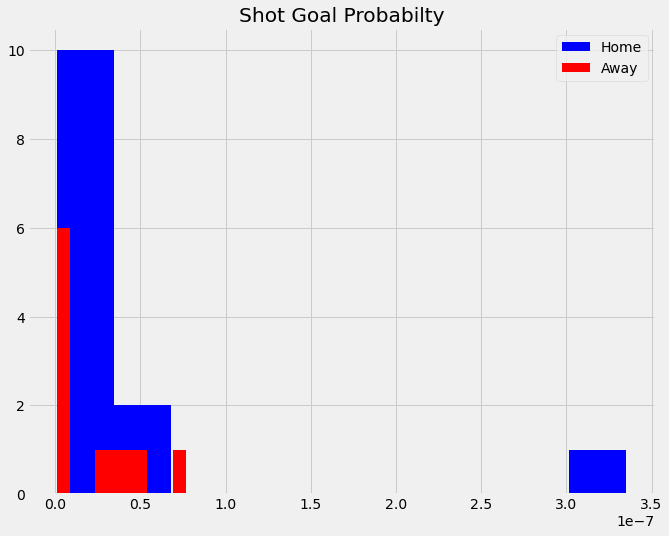

In [104]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.hist(home_shot_prob, color='blue')
plt.hist(away_shot_prob, color='red')
plt.legend(['Home', 'Away'])
plt.title('Shot Goal Probabilty')

In [74]:
fig.savefig(f'4/SHOT_Dist.png', bbox_inches='tight')

## Set Piece

In [92]:
event = pd.read_csv('sample-data-master/data/Sample_Game_2/Sample_Game_2_RawEventsData.csv')
event

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1930,Away,BALL LOST,INTERCEPTION,2,140122,5604.88,140183,5607.32,Player21,NaN,0.54,0.77,0.29,0.24
1931,Home,CHALLENGE,AERIAL-LOST,2,140180,5607.20,140180,5607.20,Player1,NaN,0.31,0.30,NaN,NaN
1932,Away,CHALLENGE,AERIAL-LOST,2,140183,5607.32,140183,5607.32,Player24,NaN,0.32,0.30,NaN,NaN
1933,Home,RECOVERY,NaN,2,140211,5608.44,140211,5608.44,Player12,NaN,0.34,0.32,NaN,NaN


In [100]:
temp = pd.read_csv('sample-data-master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv')
ball = pd.DataFrame(data=temp.iloc[2:,:].values, columns=temp.iloc[1,:].values)
ball = ball.dropna(subset=['Ball'])
ball = ball.iloc[:, [2,27,28]]
ball.columns = ['Time [s]','BallX','BallY']
ball['Time [s]'] = ball['Time [s]'].astype(float)
ball

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time [s],BallX,BallY
50,2.04,0.50216,0.50376
51,2.08,0.5004,0.50384
52,2.12,0.4977,0.50397
53,2.16,0.495,0.5041
54,2.20,0.4923,0.50422
...,...,...,...
140293,5611.76,0.40008,-0.01407
140294,5611.80,0.40246,-0.02028
140295,5611.84,0.40483,-0.02649
140296,5611.88,0.40721,-0.0327


In [101]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

find_nearest(np.array([1,2,3,6,10]), 7)

6

In [103]:
temp = event[event.Type == 'SET PIECE']
X = []
Y = []
for i in range(len(temp)):
    near_time = find_nearest(ball['Time [s]'].values, temp['Start Time [s]'].values[i])
    record  = ball[ball['Time [s]'] == near_time]
    X.append(record.BallX.item())
    Y.append(record.BallY.item())
    
temp['X'] = X
temp['Y'] = Y
temp

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,X,Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN,0.50216,0.50376
11,Away,SET PIECE,THROW IN,1,672,26.88,672,26.88,Player15,NaN,NaN,NaN,NaN,NaN,0.49678,1.00836
111,Home,SET PIECE,THROW IN,1,6354,254.16,6354,254.16,Player1,NaN,NaN,NaN,NaN,NaN,0.3736,-0.00316
129,Home,SET PIECE,FREE KICK,1,8148,325.92,8148,325.92,Player6,NaN,NaN,NaN,NaN,NaN,0.651,0.32062
140,Home,SET PIECE,THROW IN,1,8720,348.80,8720,348.80,Player4,NaN,NaN,NaN,NaN,NaN,0.72241,1.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Away,SET PIECE,FREE KICK,2,130698,5227.92,130698,5227.92,Player20,NaN,NaN,NaN,NaN,NaN,0.48884,0.59832
1842,Away,SET PIECE,FREE KICK,2,132570,5302.80,132570,5302.80,Player18,NaN,NaN,NaN,NaN,NaN,0.18152,0.37860
1853,Away,SET PIECE,THROW IN,2,133756,5350.24,133756,5350.24,Player18,NaN,NaN,NaN,NaN,NaN,0.52182,1.01199
1921,Home,SET PIECE,FREE KICK,2,138250,5530.00,138250,5530.00,Player3,NaN,NaN,NaN,NaN,NaN,0.33045,0.05978


In [111]:
temp.X = temp.X.astype(float)
temp.Y = temp.Y.astype(float)

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [112]:
dis = []
for i in range(len(temp)):
    if temp.Team.values[i] == 'Away' and temp.Period.values[i] == 1:
        loc = away_1_home_2
    elif temp.Team.values[i] == 'Away' and temp.Period.values[i] == 2:
        loc = away_2_home_1
    elif temp.Team.values[i] == 'Home' and temp.Period.values[i] == 1:
        loc = away_2_home_1
    elif temp.Team.values[i] == 'Home' and temp.Period.values[i] == 2:
        loc = away_1_home_2
        
    dis.append(distance(temp['X'].values[i], temp['Y'].values[i], loc))
    
temp['Distance'] = dis
temp

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,X,Y,Distance
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN,0.50216,0.50376,75.324434
11,Away,SET PIECE,THROW IN,1,672,26.88,672,26.88,Player15,NaN,NaN,NaN,NaN,NaN,0.49678,1.00836,82.144769
111,Home,SET PIECE,THROW IN,1,6354,254.16,6354,254.16,Player1,NaN,NaN,NaN,NaN,NaN,0.37360,-0.00316,99.995698
129,Home,SET PIECE,FREE KICK,1,8148,325.92,8148,325.92,Player6,NaN,NaN,NaN,NaN,NaN,0.65100,0.32062,53.752300
140,Home,SET PIECE,THROW IN,1,8720,348.80,8720,348.80,Player4,NaN,NaN,NaN,NaN,NaN,0.72241,1.00683,54.051478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Away,SET PIECE,FREE KICK,2,130698,5227.92,130698,5227.92,Player20,NaN,NaN,NaN,NaN,NaN,0.48884,0.59832,76.964938
1842,Away,SET PIECE,FREE KICK,2,132570,5302.80,132570,5302.80,Player18,NaN,NaN,NaN,NaN,NaN,0.18152,0.37860,123.049227
1853,Away,SET PIECE,THROW IN,2,133756,5350.24,133756,5350.24,Player18,NaN,NaN,NaN,NaN,NaN,0.52182,1.01199,79.729976
1921,Home,SET PIECE,FREE KICK,2,138250,5530.00,138250,5530.00,Player3,NaN,NaN,NaN,NaN,NaN,0.33045,0.05978,57.905431


In [113]:
temp.Subtype.unique()

array(['KICK OFF', 'THROW IN', 'FREE KICK', 'CORNER KICK',
       'KICK OFF-RETAKEN', 'FREE KICK-RETAKEN', 'PENALTY'], dtype=object)

In [114]:
home_set_prob = []
temp_ = temp[temp.Team == 'Home']
for i in range(len(temp_)):
    head = 0
    
    if 'FREE KICK' in temp.Subtype.values[i]:
        freekick = 1
    else:
        freekick = 0
        
    if 'CORNER KICK' in temp.Subtype.values[i]:
        corner = 1
    else:
        corner = 0
    
    if 'PENALTY' in temp.Subtype.values[i]:
        penalty = 1
    else:
        penalty = 0
        
    if penalty == 0 and corner == 0 and freekick == 0:
        els = 1
    else:
        els = 0
        
    features = [train.interveningOpponents.mean(), train.interveningTeammates.mean(), train.interferenceOnShooter.mean(),
                mms_time.transform([[temp_['Start Time [s]'].values[i]]])[0][0],
                mms_dist.transform([[temp_['Distance'].values[i]]])[0][0],
                0, freekick, corner, penalty, els, head, 0, 1]
    home_set_prob.append(model.predict_proba(np.array(features).reshape(1,-1))[0, 1])

away_set_prob = []
temp_ = temp[temp.Team == 'Away']
for i in range(len(temp_)):
    head = 0
    
    
    if 'FREE KICK' in temp.Subtype.values[i]:
        freekick = 1
    else:
        freekick = 0
        
    if 'CORNER KICK' in temp.Subtype.values[i]:
        corner = 1
    else:
        corner = 0
    
    if 'PENALTY' in temp.Subtype.values[i]:
        penalty = 1
    else:
        penalty = 0
        
    if penalty == 0 and corner == 0 and freekick == 0:
        els = 1
    else:
        els = 0
        
    features = [train.interveningOpponents.mean(), train.interveningTeammates.mean(), train.interferenceOnShooter.mean(),
                mms_time.transform([[temp_['Start Time [s]'].values[i]]])[0][0],
                mms_dist.transform([[temp_['Distance'].values[i]]])[0][0],
                0, freekick, corner, penalty, els, head, 0, 1]
    away_set_prob.append(model.predict_proba(np.array(features).reshape(1,-1))[0, 1])

Text(0.5, 1.0, 'Set Piece Goal Probabilty Home')

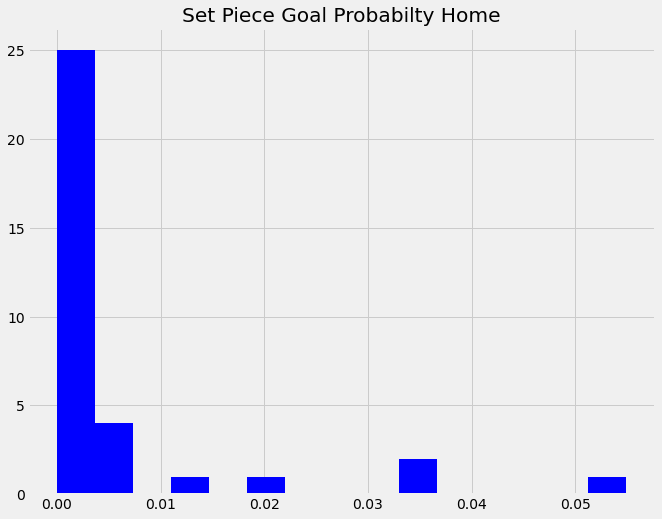

In [121]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.hist(home_set_prob, color='blue', bins=15)
plt.title('Set Piece Goal Probabilty Home')

In [122]:
fig.savefig(f'4/SET_Dist_Home.png', bbox_inches='tight')

Text(0.5, 1.0, 'Set Piece Goal Probabilty Away')

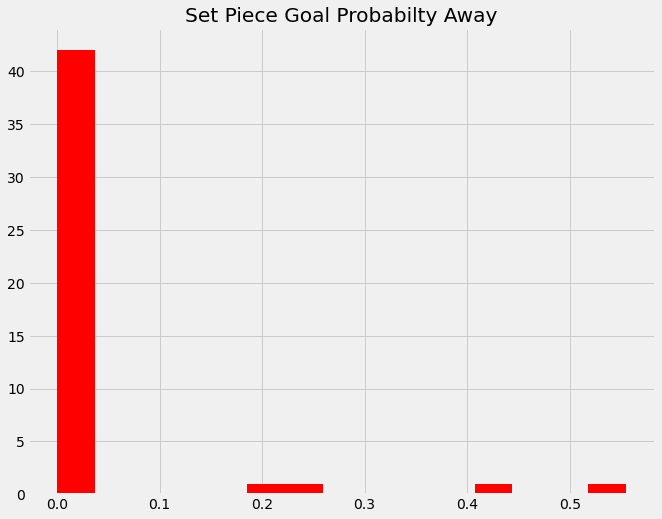

In [139]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.hist(away_set_prob, color='red', bins=15)
plt.title('Set Piece Goal Probabilty Away')

In [140]:
fig.savefig(f'4/SET_Dist_Away.png', bbox_inches='tight')

## Ball

In [127]:
temp = pd.read_csv('sample-data-master/data/Sample_Game_2/Sample_Game_2_RawTrackingData_Away_Team.csv')
ball = pd.DataFrame(data=temp.iloc[2:,:].values, columns=temp.iloc[1,:].values)
ball = ball.dropna(subset=['Ball'])
ball = ball.iloc[:, [0, 2,27,28]]
ball.columns = ['Period', 'Time [s]','BallX','BallY']
ball['Time [s]'] = ball['Time [s]'].astype(float)
ball.BallX = ball.BallX.astype(float)
ball.BallY = ball.BallY.astype(float)
ball

c:\users\asus\desktop\ali\programming\pythoninstall\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Period,Time [s],BallX,BallY
50,1,2.04,0.50216,0.50376
51,1,2.08,0.50040,0.50384
52,1,2.12,0.49770,0.50397
53,1,2.16,0.49500,0.50410
54,1,2.20,0.49230,0.50422
...,...,...,...,...
140293,2,5611.76,0.40008,-0.01407
140294,2,5611.80,0.40246,-0.02028
140295,2,5611.84,0.40483,-0.02649
140296,2,5611.88,0.40721,-0.03270


In [128]:
fist_half = ball[ball.Period == 1].BallX
second_half = ball[ball.Period == 2].BallX

Text(0.5, 1.0, 'ّFirst Half')

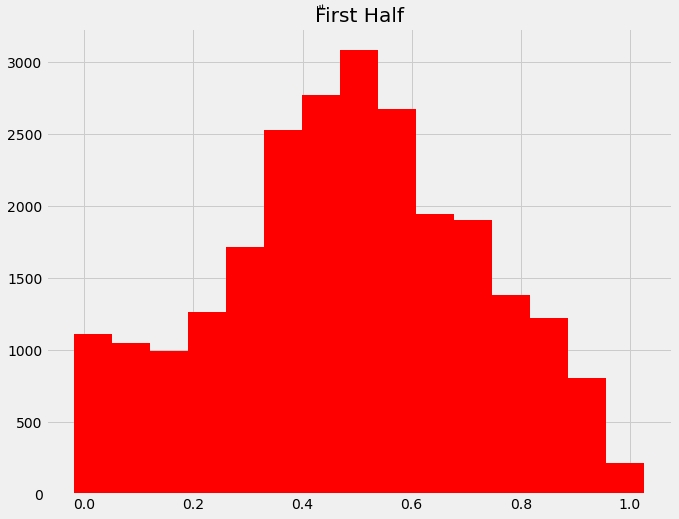

In [135]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.hist(fist_half, color='red', bins=15)
plt.title('ّFirst Half')

In [136]:
fig.savefig(f'4/FirstHalf.png', bbox_inches='tight')

Text(0.5, 1.0, 'Second Half')

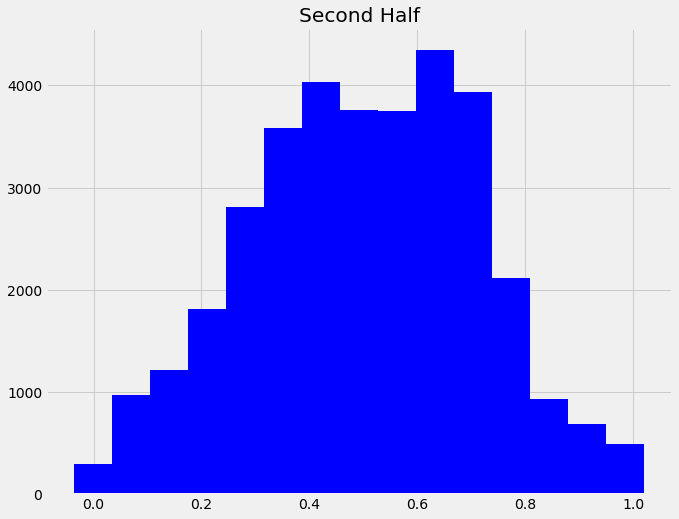

In [137]:
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(10, 8))

plt.hist(second_half, color='blue', bins=15)
plt.title('Second Half')

In [138]:
fig.savefig(f'4/SecondHalf.png', bbox_inches='tight')